In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image

In [59]:
einstein_image = Image.open('assets/lord_einstein.jpg')
einstein_image = np.array(einstein_image)[:, :, 0]

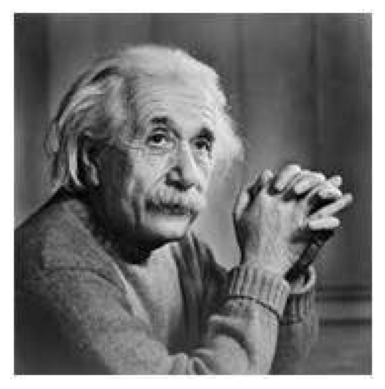

In [60]:
plt.imshow(einstein_image, cmap='gray')
plt.axis('off');

In [61]:
def get_kernel(name):
    # return the kernel based on the name
    if name == 'gaussian':
        kernel = np.array([[2,  4, 5, 4, 2],
                           [4,  9, 12, 9, 4],
                           [5, 12, 15, 12, 5],
                           [4,  9, 12, 9, 4],
                           [2,  4, 5, 4, 2]]) / 159.
    
    elif name == 'sobelY':
        kernel = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
        
    elif name == 'sobelX':
        kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
        
    else:
        kernel = None
        
    return kernel


In [62]:
def conv(image, kernel, stride=1):
    # implement conv operation here
    
    r = image.shape[0]
    c = image.shape[1]    
    k = kernel.shape[0]
    
    new_image = np.zeros((r-k + 1, c - k + 1))
    
    for x in range(0, r-k + 1, stride):
        for y in range(0, c - k + 1, stride):
            value = 0
            for i in range(k):
                for j in range(k):
                    value += image[x+i, y+j] * kernel[j, i]
                    
            new_image[x, y] = value
    return new_image

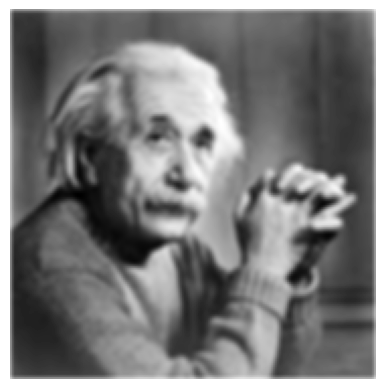

In [65]:
gaussian = get_kernel('gaussian')
smoothened = conv(einstein_image, gaussian)
plt.imshow(smoothened, cmap='gray')
plt.axis('off');

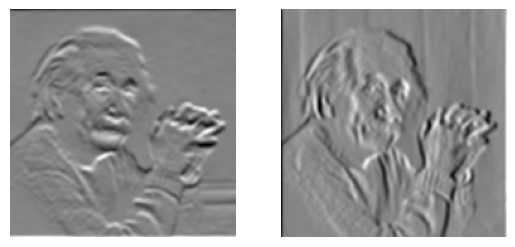

In [73]:
sobel_x = conv(smoothened, get_kernel('sobelX'))
sobel_y = conv(smoothened, get_kernel('sobelY'))

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(sobel_x, cmap='gray')
ax2.imshow(sobel_y, cmap='gray')
ax1.set_axis_off()
ax2.set_axis_off()

(-0.5, 178.5, 180.5, -0.5)

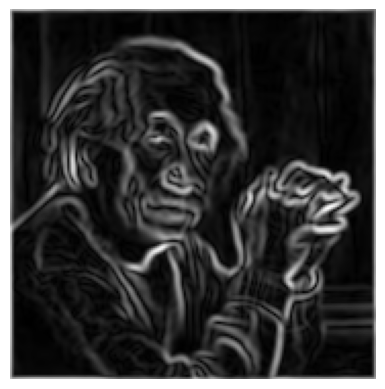

In [77]:
final = np.linalg.norm(np.stack([sobel_x, sobel_y], axis=2), axis=2)
plt.imshow(final, cmap='gray')
plt.axis('off')